# **Growth and Unemployment Cycles**

In this project, I examine the growth in GDP and the unemployment rate in different countries and regions, using data from the World Bank up to 2023, and basing my analysis on the methods and procedures explained in Lecture 3 of "A First Course in Quantitative Economics with Python" by QuantEcon.

__Name__: Jorge Pineño

__LinkedIn__: www.linkedin.com/in/jorge-p-6118ba31b

## Resources used:

__World Bank GDP growth data:__ https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG

__World Bank unemployment data:__ https://data.worldbank.org/indicator/SL.UEM.TOTL.NE.ZS

__QuantEcon Lecture:__ https://intro.quantecon.org/long_run_growth.html

In [892]:
# imports:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

In [894]:
# set graphical parameters to help with colors in our plots:
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'], 
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f'])
plt.rc('axes', prop_cycle=cycler)

# **GDP growth data**:

In [897]:
# obtain GDP growth data from the World Bank we want using the series ID:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
ZWE,Zimbabwe,NaN,6.316157,1.434471,6.244345,-1.106172,4.910571,1.523130,8.367009,1.970135,...,1.484543,2.023650,0.900955,4.080264,5.009867,-6.332446,-7.816951,8.468017,6.139263,5.336730
ZMB,Zambia,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,-5.570310,7.919697,1.248330,...,4.693283,2.920375,3.755100,3.525863,4.034494,1.441306,-2.785055,6.234922,5.211224,5.367943
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
PSE,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.157867,3.721300,8.864619,1.419368,1.227077,1.362687,-11.318466,7.011982,4.082760,-5.410937
VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.774530,-0.425080,1.600854,-0.735294,1.878307,2.908335,-1.614938,3.667607,-1.311232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.252140,4.006392,2.784150,5.121377,5.040764,4.005993,-3.329069,6.532150,4.067238,0.639831
CSS,Caribbean small states,NaN,7.386994,6.765066,0.483418,8.455732,10.621205,8.436269,8.874911,6.584703,...,1.755561,0.213765,0.394021,1.863156,2.778989,1.055088,-9.602316,10.442956,23.067604,12.557635
ARB,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.772778,10.801073,...,2.522351,3.243989,3.614307,1.537753,2.630040,1.583715,-4.711784,4.031106,5.721433,1.020751


In [898]:
# modify the DataFrame to change the format of the dates
# and set the index to the countries:
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,NaN,6.316157,1.434471,6.244345,-1.106172,4.910571,1.523130,8.367009,1.970135,12.428236,...,1.484543,2.023650,0.900955,4.080264,5.009867,-6.332446,-7.816951,8.468017,6.139263,5.336730
Zambia,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,-5.570310,7.919697,1.248330,-0.436916,...,4.693283,2.920375,3.755100,3.525863,4.034494,1.441306,-2.785055,6.234922,5.211224,5.367943
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.157867,3.721300,8.864619,1.419368,1.227077,1.362687,-11.318466,7.011982,4.082760,-5.410937
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.774530,-0.425080,1.600854,-0.735294,1.878307,2.908335,-1.614938,3.667607,-1.311232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.252140,4.006392,2.784150,5.121377,5.040764,4.005993,-3.329069,6.532150,4.067238,0.639831
Caribbean small states,NaN,7.386994,6.765066,0.483418,8.455732,10.621205,8.436269,8.874911,6.584703,7.377482,...,1.755561,0.213765,0.394021,1.863156,2.778989,1.055088,-9.602316,10.442956,23.067604,12.557635
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.772778,10.801073,7.463789,...,2.522351,3.243989,3.614307,1.537753,2.630040,1.583715,-4.711784,4.031106,5.721433,1.020751


In [899]:
# focus on the evolution of GDP growth in Spain, Germany, France,
# the USA, China, and Japan:
gdp_growth = gdp_growth.loc[['Spain', 'Germany', 'France',
                         'United States', 'China', 'Japan']]
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Spain,NaN,11.838674,9.953438,9.596499,5.308510,6.253135,7.246060,4.340338,6.597020,8.907016,...,1.520486,4.060867,2.915156,2.896042,2.395411,1.961179,-10.940071,6.683144,6.179312,2.675663
Germany,NaN,4.298440,4.623471,2.735296,6.639470,5.244164,2.812181,-0.330256,5.668773,7.418103,...,2.169499,1.652720,2.294711,2.716025,1.116443,0.987893,-4.095137,3.670000,1.369731,-0.266438
France,NaN,4.803832,6.871699,6.198635,6.425865,4.807918,5.210183,4.896358,4.450457,7.113149,...,0.997833,1.066755,0.860031,2.083615,1.645909,2.027446,-7.440646,6.882338,2.570840,0.936488
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556
China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,16.940000,...,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.448469,2.950670,5.249558
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020


In [900]:
# write a function to generate plots for individual
# countries and their recessions:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted and adds a dotted line 
    from the last data point to the y-axis, displaying the last value in 
    a separate box below the graph.

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    ylim : float, optional
        Limit of the y-axis
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params)
    
    # Set title and margins:
    plt.title(f'{country} GDP Growth Rate 1961-2023', fontsize=14, pad=35)
    plt.margins(x=0)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)

    if ylim is not None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]

    ax.text(1974, ylim + ylim * txt_pos, 'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim * txt_pos, '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim * txt_pos, 'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim * txt_pos, 'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')

    # Get the last year and last GDP growth value
    last_year = data.columns[-1]
    last_value = data.loc[country, last_year]
    first_year = data.columns[0]  # Start of x-axis

    # Extend the dotted line from last value to the y-axis (x=0)
    ax.plot([first_year, last_year], [last_value, last_value], 'k:', alpha=0.6)

    # Add a separate box below the graph for the last value
    ax.annotate(f"2023 GDP growth rate: {last_value:.2f}%", 
                xy=(0.5, -0.1), xycoords='axes fraction',  # Position below the graph
                fontsize=10, color='black',
                bbox=dict(facecolor='white'),
                ha='center', va='top')

    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

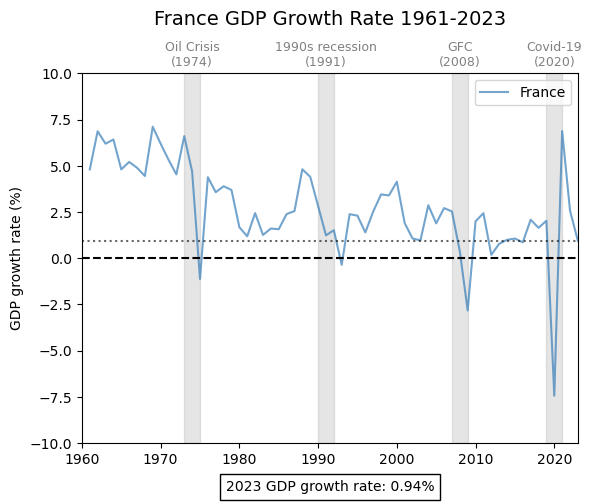

In [901]:
# plot data for France:
fig, ax = plt.subplots()

country = 'France'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim=10)
plt.show()

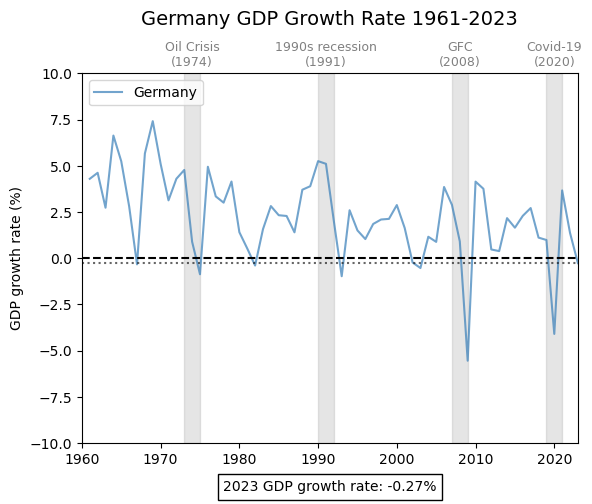

In [902]:
# plot data for Germany:
fig, ax = plt.subplots()

country = 'Germany'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim=10)
plt.show()

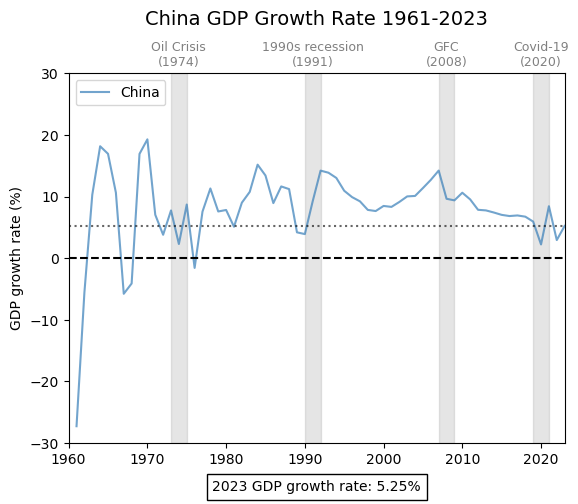

In [903]:
# plot data for China:
fig, ax = plt.subplots()

country = 'China'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params,
            t_params, ylim=30)
plt.show()

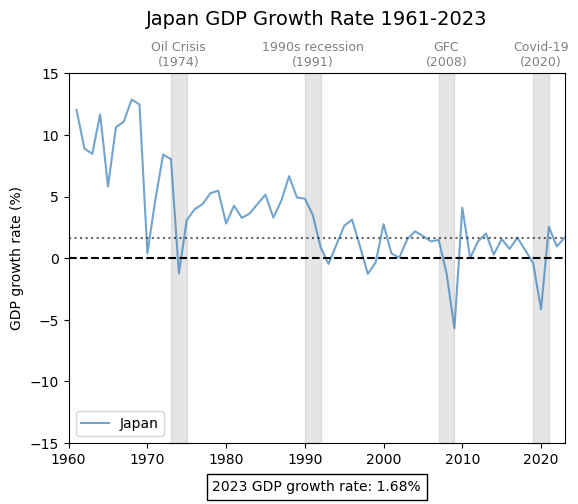

In [904]:
# plot data for Japan:
fig, ax = plt.subplots()

country = 'Japan'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params,
            t_params, ylim=15)
plt.show()

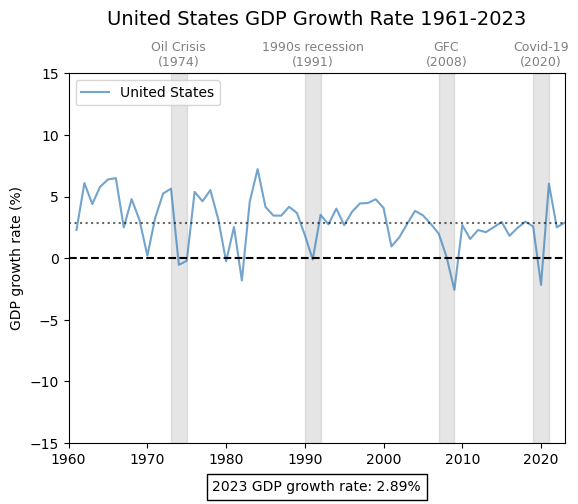

In [905]:
# plot data for the USA:
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params,
            t_params, ylim=15)
plt.show()

# **Multiple countries data**:

In [907]:
# modify our previous "plot_series" function to now
# include multiple countries' data:
def plot_comparison(data, countries, ylabel,
                    txt_pos, y_lim, ax, baseline=0, indicator="GDP Growth Rate"):
    """
    Plot multiple series on the same graph with separate value boxes.

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    countries : list
        List of countries to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    indicator : str, optional
        The economic indicator being plotted (e.g., "GDP Growth" or "Unemployment Rate").
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    # Set title dynamically
    plt.title(f'{", ".join(countries)} {indicator} 1960-2023', fontsize=14, pad=35)
    plt.margins(x=0)

    # Plot each country's data
    for country in countries:
        ax.plot(data.loc[country], label=country, **g_params)

    # Highlight recessions
    for start, end in [(1973, 1975), (1990, 1992), (2007, 2009), (2019, 2021)]:
        ax.axvspan(start, end, **b_params)

    if y_lim is not None:
        ax.set_ylim([-y_lim, y_lim])
    ylim = ax.get_ylim()[1]

    # Add recession labels
    recession_labels = {
        1974: 'Oil Crisis\n(1974)',
        1991: '1990s recession\n(1991)',
        2008: 'GFC\n(2008)',
        2020: 'Covid-19\n(2020)'
    }
    
    for year, label in recession_labels.items():
        ax.text(year, ylim + ylim * txt_pos, label, **t_params)

    # Add a baseline for reference
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')

    # Get the last year and last values
    last_year = data.columns[-1]

    # Place boxes side by side
    box_y_positions = np.linspace(-0.1, -0.26, len(countries))  # Adjust horizontal positions dynamically

    for i, country in enumerate(countries):
        last_value = data.loc[country, last_year]

        ax.annotate(f"{country} 2023 {indicator}: {last_value:.2f}%", 
                    xy=(0.5, box_y_positions[i]), xycoords='axes fraction',  
                    fontsize=10, color='black',
                    bbox=dict(facecolor='white'),
                    ha='center', va='top')

    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

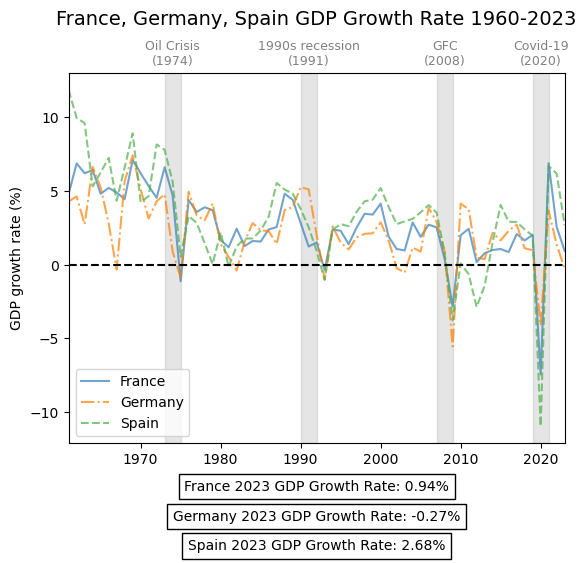

In [908]:
# plot for France, Germany, and Spain:
fig, ax = plt.subplots()
countries = ['France', 'Germany', 'Spain']
ylabel = 'GDP growth rate (%)'
plot_comparison(gdp_growth.loc[countries, 1960:], 
                countries, ylabel, 0.1, None, ax=ax)
plt.show()

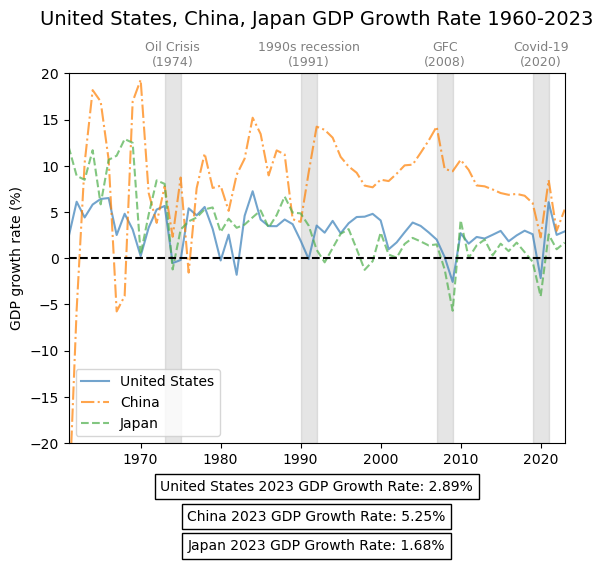

In [909]:
# plot for the USA, China, and Japan:
fig, ax = plt.subplots()
countries = ['United States', 'China', 'Japan']
ylabel = 'GDP growth rate (%)'
plot_comparison(gdp_growth.loc[countries, 1960:], 
                countries, ylabel, 0.1, 20, ax=ax)
plt.show()

# **Unemployment data**:

In [911]:
# get unemployment data from the World Bank for our countries:
unempl_rate = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS',
    ['USA', 'FRA', 'DEU', 'JPN', 'CHN', 'ESP'], labels=True)
unempl_rate = unempl_rate.set_index('Country')
unempl_rate.columns = unempl_rate.columns.str.replace('YR', '').astype(int)
unempl_rate

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,...,24.441,22.057,19.635,17.224,15.255,14.105,15.532,14.781,12.917,12.179
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.100,NaN,NaN,3.900,4.930,5.150,5.610,5.110,NaN,NaN
Japan,1.7,1.4,1.3,1.3,1.1,1.2,1.3,1.3,1.2,1.1,...,3.589,3.385,3.132,2.822,2.467,2.351,2.809,2.809,2.615,2.600
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.980,4.612,4.104,3.781,3.384,3.163,3.881,3.594,3.120,3.068
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.273,10.354,10.057,9.410,9.018,8.415,8.010,7.871,7.303,7.335
United States,5.5,6.7,5.5,5.7,5.2,4.5,3.8,3.8,3.6,3.5,...,6.168,5.280,4.869,4.355,3.896,3.669,8.055,5.349,3.650,3.638


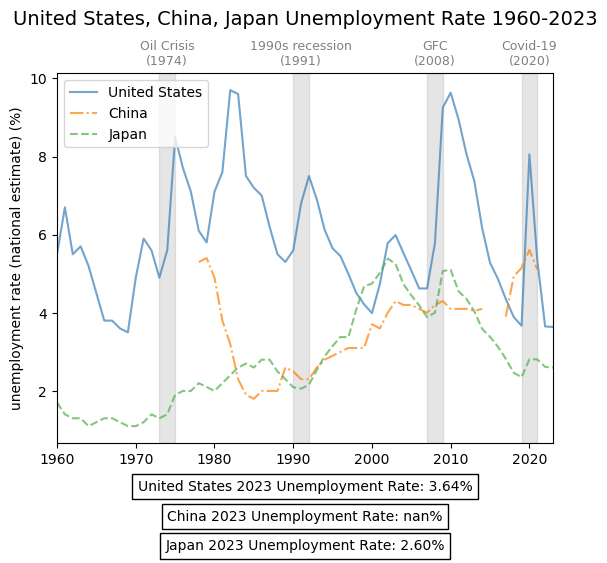

In [912]:
# plot the unemployment rate of the USA, China, and Japan to observe
# the experience of each of them during recessions:
fig, ax = plt.subplots()

countries = ['United States', 'China', 'Japan']
ylabel = 'unemployment rate (national estimate) (%)'
plot_comparison(unempl_rate.loc[countries, 1960:], 
                countries, ylabel, 0.05, None, ax=ax, baseline=None,
                indicator="Unemployment Rate")
plt.show()

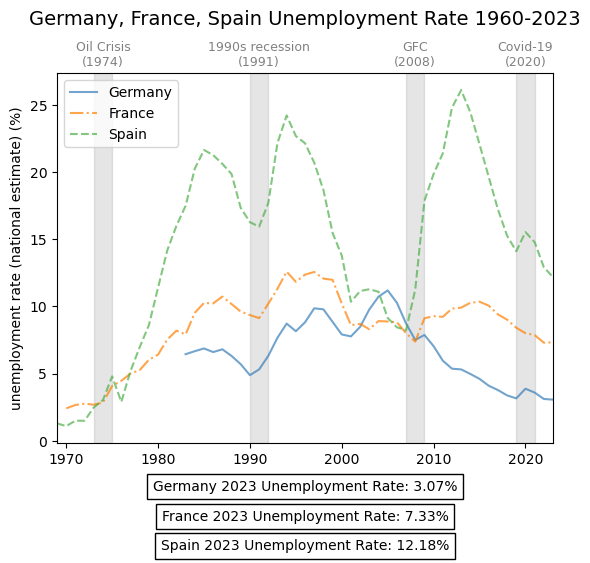

In [913]:
# plot the unemployment rate of Germany, France, and Spain to observe
# the experience of each of them during recessions:
fig, ax = plt.subplots()

countries = ['Germany','France', 'Spain']
ylabel = 'unemployment rate (national estimate) (%)'
plot_comparison(unempl_rate.loc[countries, 1960:], 
                countries, ylabel, 0.05, None, ax=ax, baseline=None,
                indicator="Unemployment Rate")
plt.show()

# **GDP growth and unemployment analysis**:

In [915]:
# modify our previous "plot_series" function to now
# plot data for  both GDP growth and unemployment:
def plot_gdp_unemployment(gdp_data, unempl_data, country, 
                          ylabel1, ylabel2, txt_pos, ax, 
                          u_params, ylim=15, baseline=0):
    """
    Plots GDP growth and unemployment rate for a given country on the same graph.
    Highlights recessions and adds a dotted line from the last data points 
    to the y-axis, displaying the last values in separate boxes below the graph.

    Parameters
    ----------
    gdp_data : pd.Series
        Series containing GDP growth rate data for a single country.
    unempl_data : pd.Series
        Series containing unemployment rate data for a single country.
    country : str
        Name of the country to plot.
    ylabel1 : str
        Label of the y-axis for GDP growth.
    ylabel2 : str
        Label of the y-axis for unemployment rate.
    txt_pos : float
        Position of the recession labels.
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on.
    u_params : dict
        Parameters for the unemployment rate line.
    ylim : float, optional
        Limit of the y-axis.
    baseline : float, optional
        Dashed baseline on the plot, by default 0.

    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    # Plot GDP growth and unemployment rate
    ax.plot(gdp_data, label="GDP Growth", **g_params)
    ax.plot(unempl_data, label="Unemployment Rate", **u_params)

    # Set title and margins
    plt.title(f'{country} GDP Growth & Unemployment Rate (1961-2023)', fontsize=14, pad=35)
    plt.margins(x=0)

    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)

    # Adjust y-axis limits
    if ylim is not None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]

    # Add recession labels
    ax.text(1974, ylim + ylim * txt_pos, 'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim * txt_pos, '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim * txt_pos, 'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim * txt_pos, 'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')

    # Get last year and values for both GDP growth and unemployment rate
    last_year = gdp_data.index[-1]  # Use .index to get the years
    first_year = gdp_data.index[0]
    last_gdp = gdp_data.iloc[-1]  # Use .iloc to get the last value
    last_unempl = unempl_data.iloc[-1]

    # Extend dotted lines from last values to the y-axis
    ax.plot([first_year, last_year], [last_gdp, last_gdp], 'k:', alpha=0.6)
    ax.plot([first_year, last_year], [last_unempl, last_unempl], 'k:', alpha=0.6)

    # Add separate boxes below the graph for last values
    ax.annotate(f"2023 GDP growth: {last_gdp:.2f}%", 
                xy=(0.5, -0.1), xycoords='axes fraction',  
                fontsize=10, color='black',
                bbox=dict(facecolor='white'),
                ha='center', va='top')

    ax.annotate(f"2023 Unemployment: {last_unempl:.2f}%", 
                xy=(0.5, -0.18), xycoords='axes fraction',  
                fontsize=10, color='black',
                bbox=dict(facecolor='white'),
                ha='center', va='top')

    # Set labels
    ax.set_ylabel(f"{ylabel1} & {ylabel2}")
    ax.legend()
    return ax

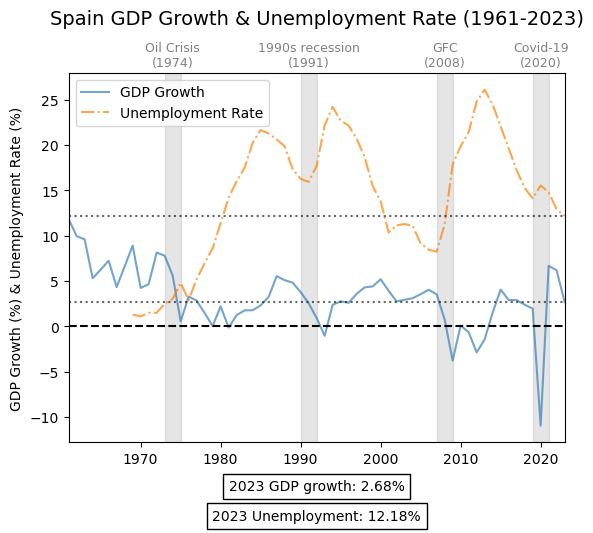

In [916]:
# plot the unemployment rate and GDP growth rate of Spain:
fig, ax = plt.subplots()

country = 'Spain'
plot_gdp_unemployment(gdp_growth.loc[country, 1961:], unempl_rate.loc[country, 1961:], country=country, 
                      ylabel1="GDP Growth (%)", ylabel2="Unemployment Rate (%)",
                      txt_pos=0.07, ax=ax, 
                      u_params=u_params, ylim=None, baseline=0)
plt.show()

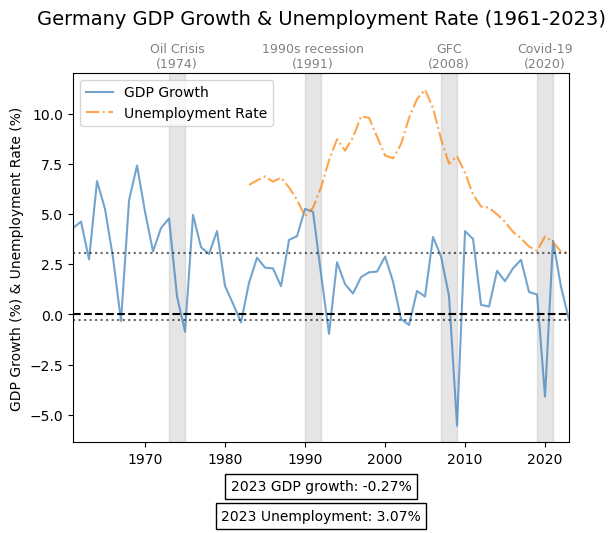

In [917]:
# plot the unemployment rate and GDP growth rate of Germany:
fig, ax = plt.subplots()

country = 'Germany'
plot_gdp_unemployment(gdp_growth.loc[country, 1961:], unempl_rate.loc[country, 1961:], country=country, 
                      ylabel1="GDP Growth (%)", ylabel2="Unemployment Rate (%)",
                      txt_pos=0.07, ax=ax, 
                      u_params=u_params, ylim=None, baseline=0)
plt.show()

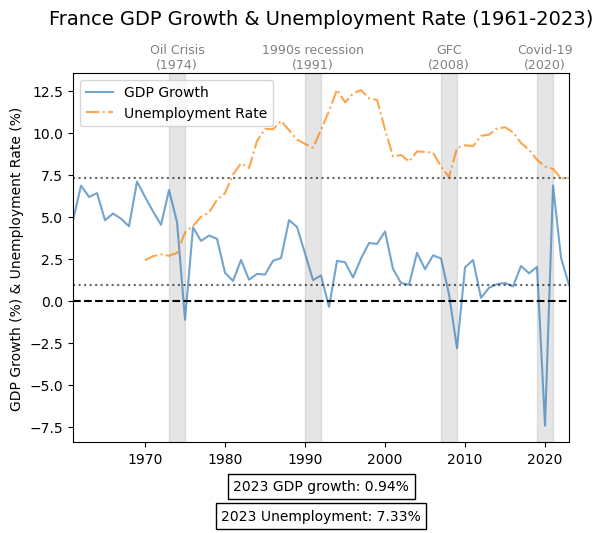

In [918]:
# plot the unemployment rate and GDP growth rate of France:
fig, ax = plt.subplots()

country = 'France'
plot_gdp_unemployment(gdp_growth.loc[country, 1961:], unempl_rate.loc[country, 1961:], country=country, 
                      ylabel1="GDP Growth (%)", ylabel2="Unemployment Rate (%)",
                      txt_pos=0.07, ax=ax, 
                      u_params=u_params, ylim=None, baseline=0)
plt.show()

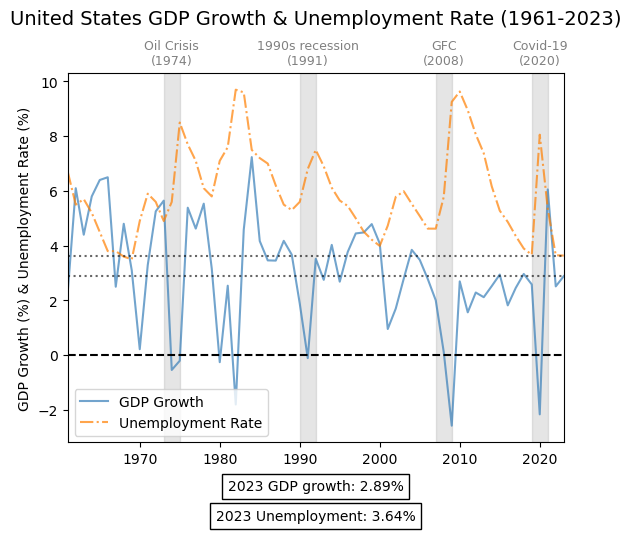

In [919]:
# plot the unemployment rate and GDP growth rate of the USA:
fig, ax = plt.subplots()

country = 'United States'
plot_gdp_unemployment(gdp_growth.loc[country, 1961:], unempl_rate.loc[country, 1961:], country=country, 
                      ylabel1="GDP Growth (%)", ylabel2="Unemployment Rate (%)",
                      txt_pos=0.07, ax=ax, 
                      u_params=u_params, ylim=None, baseline=0)
plt.show()

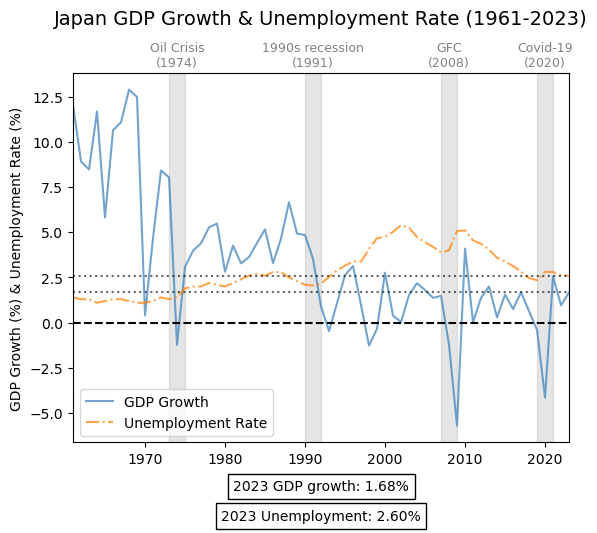

In [920]:
# plot the unemployment rate and GDP growth rate of Japan:
fig, ax = plt.subplots()

country = 'Japan'
plot_gdp_unemployment(gdp_growth.loc[country, 1961:], unempl_rate.loc[country, 1961:], country=country, 
                      ylabel1="GDP Growth (%)", ylabel2="Unemployment Rate (%)",
                      txt_pos=0.07, ax=ax, 
                      u_params=u_params, ylim=None, baseline=0)
plt.show()